# Introduction to Machine Learning with scikit-learn

## Overview

### What You'll Learn
In this section, you'll learn
1. How to find and explore a dataset
2. How to create training and testing sets, as well as why you need both
3. How to use scikit-learn to implement Linear Regression and Logistic Regression models

### Prerequisites
Before starting this section, you should have an understanding of
1. [Basic Python (functions, loops, lists)](https://github.com/HackBinghamton/PythonWorkshop)
2. (Optional) [Matplotlib and numpy](https://github.com/HackBinghamton/DataScienceWorkshop)

### Introduction
**scikit-learn** is a Python machine learning library that allows us to easily implement various machine learning algorithms. Different ML algorithms are good at different things. There is no such thing as a one-size-fits-all ML algorithm. That's why picking the algorithm that your applying is so important. 

### Initial Setup Commands

In [16]:
# RUN ME
!pip3 install sklearn
!pip3 install matplotlib

tensorboard 2.0.0 has requirement setuptools>=41.0.0, but you'll have setuptools 39.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


tensorboard 2.0.0 has requirement setuptools>=41.0.0, but you'll have setuptools 39.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


---

# Finding a Dataset
The first step to developing a good machine learning algorithm is using a good dataset. Many of the most accurate machine learning algorithms have millions, if not billions of entries, in their training data sets. Fortuntately for us, there already exists many small yet robust datasets we can use to build our ML algorithms. 

The scikit-learn library comes with some good starting datasets. For today's activity, we'll be recognizing handwritten numbers from scikit-learn's `digits` dataset. This dataset contains over 1700 labeled 8x8 pixel images of handrawn numerical digits.

To use this dataset, we'll import the `load_digits` function from `sklearn.datasets` and store it in a variable called `digits`.

In [17]:
# RUN ME
from sklearn.datasets import load_digits
digits = load_digits()

---
# Exploring a Dataset
To get a better sense of what we're working with, let's take a look at the attributes of `digits`. If we add the following line to our code, we can see that the digits dataset has 5 attributes - `DESCR`, `data`, `images`, `target`, and `target_names`. 

In [18]:
# RUN ME
print(dir(digits))

['DESCR', 'data', 'images', 'target', 'target_names']


If we want to know even more about the dataset, we can print the description of `digits`.

In [19]:
# RUN ME
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

If we want to get the pixel values of each image in `digits`, where each image is represented by a one-dimensional array, we can use `digits.data`. 

In [20]:
# RUN ME
print(digits.data)
print(digits.data.shape)  
# NOTE: .shape is used to show the dimensions of the current data. In this case, digits is a two dimensional array 
# that has 1797 rows (1 for each image in digits) and 64 columns (1 for each pixel in an 8x8 image)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


`digits.images` also contains each image in `digits`, but each image is represented by an 8x8 array, making `digits.images` a three-dimensional array. Logistic Regression only works with two-dimensional input data, so we will **not** use this attribute for this exercise.

In [21]:
# RUN ME
print(digits.images)
print(digits.images.shape)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

`digits.target` contains the corresponding classification values for each image in `digits.data` (or `digits.image`).

In [22]:
# RUN ME
print(digits.target)

[0 1 2 ... 8 9 8]


`digits.target_names` contains all the possible classification values.

In [23]:
# RUN ME
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


We can also use the matplotlib library to display the images in this dataset. Add the following code to your script to display the first image in the dataset:

<Figure size 432x288 with 0 Axes>

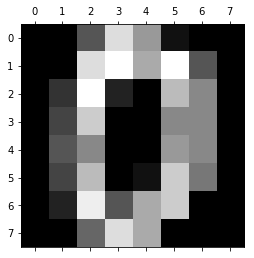

In [24]:
# RUN ME
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) # Change the number here to look at different images
plt.show() 

If all goes well, you will see the following image appear on your screen -

![matplotlib result](images/part1_matplotlib_image.png)
&nbsp;

### 📚 Further Reading
You can find other useful datasets in the [official scikit-learn documentation](https://scikit-learn.org/stable/datasets/index.html).

---

## Creating Training and Testing Sets


Now, we're going to split the data into two sets - a training set and a testing set. The training set will be used to train the machine learning algorithms, whereas the testing set will be used to verify the accuracy of the machine learning algorithms. 


To better visualize this relationship, think of a time where you studied for a math exam by completing practice problems, and tested your knowledge by completing the exam. The practice problems you completed were your training set, and the real exam was the testing set. 

Thankfully, scikit-learn gives us a method for automatically splitting up our full dataset into smaller training and testing sets.

⚠ **It is imperative that you keep your training and testing sets separate during the training process.** If your machine learning algorithm is tested with a data point it's already seen before, it may report a testing accuracy that is higher than it actually is.

In [25]:
# RUN ME
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, 
                                                    digits.target, 
                                                    test_size=0.50, 
                                                    random_state=42)

In the above example, we pass the following information to the `train_test_split` method from scikit-learn's `model_selection` sublibrary:
* `digits.data`: The image data for each image in the `digits` dataset. Each image is a 64-bit array, where each item is either 0 or 1.
* `digits.target`: The classification data for each image in the `digits` dataset. In other words, this contains the actual digit the image represents.
* `test_size=0.50`: 50% of the images in the `digits` dataset should be used for the testing set. This means that the other 50% will be used for the training set.
* `random_state=42`: Seeds the random value with 42. Machine learning algorithms have a degree of randomness, which we mitigate by using the same random seed. Without a constant random seed, our model would have a slightly different accuracy on every run. A constant random seed is useful when building machine learning models because if we improve the model's accuracy, we can be confident that the improved accuracy was due to our improvement and not just statistical variance.
  * There is no significance to the number 42 in the context of this program. It's just a pleasant number.

&nbsp;

`train_test_split` then divides it into the following arrays:
* `X_train`, a two-dimensional array containing a certain amount of entries from the main dataset. 
  * Does not include the expected outcome of each data entry.
* `Y_train`, a one-dimensional array containing the expected outcome of each data entry in `X_train`.
* `X_test`, a two-dimensional array containing a certain amount of entries from the main dataset. 
  * Does not include the expected outcome of each data entry.
* `Y_test`, a one-dimensional array containing the expected outcome of each data entry in `X_test`.

&nbsp;

Continuing our analogy of studying for a math exam, 
* `X_train` contains all your answers to the practice problems
* `Y_train` contains all the correct answers to the practice problems
* `X_test` contains all your answers to the real exam
* `Y_test` contains all the correct answers to the real exam

### 🤔 Food for Thought 
It can be tough to find a good ratio between the training and testing set size. In this case, we split it evenly (`test_size=0.5`), but many algorithms use much smaller testing set sizes (closer to 0.2). Although it may be tempting to improve your algorithm's accuracy by increasing the size of the training set, also consider that this will increase testing accuracy's margin of error.

---

# Using a Machine Learning Algorithm
Let's get to the fun part, using these algorithms!
For now, we'll start off with two regression-based algorithms for supervised learning: Linear Regression and Logistic Regression.
&nbsp;
&nbsp;

We'll start by importing both algorithms from scikit-learn.

In [26]:
# RUN ME
from sklearn.linear_model import LinearRegression, LogisticRegression

## Linear Regression

Linear Regression is one of the gold standards in machine learning algorithms. It's very simple, powerful, and easy to interpret. You can think of it as trying to draw a line of best fit in your data like so:

![Linear Regression](images/line-of-best-fit.png)

To implement a Linear Regression model with `scikit-learn`, we must first initialize a `LinearRegression` object.

In [ ]:
# RUN ME
linear_model = LinearRegression()

We then fit our newly created object to the training data.

In [27]:
# RUN ME
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

However, there are cases where drawing a simple line of best fit just won't help. That's where
Logistic Regression might come in handy!

## Logistic Regression

In a very simple case, Logistic Regression can kind of be thought as drawing an
S-shaped line of best fit. Here's a visualization:

![Logistic Regression](images/logit.jpeg)

In short, Logistic Regression is generally used for classifying discrete values (e.g. choosing either 1 or 0), whereas
Linear Regression is generally used for predicting continuous values (e.g. choosing a decimal between 1 and 0).

First, we initialize our `LogisticRegression` object:

In [40]:
# RUN ME
#
# lbfgs is a parameter estimation algorithm. Read more at https://en.wikipedia.org/wiki/Limited-memory_BFGS.
#
# multi_class=multinomial specifies that our problem has several different classifications. If our
# problem had a binary classification (so we were trying to determine if our outcome was strictly 0 or 1), 
# we would want to do multi_class='ovr' instead. Alternatively, we can also have scikit-learn choose for us
# by doing multi_class='auto'.
#
# max_iter=10000 specifies that it should take no more than 10000 iterations for the logistic model to converge
# to a classification.

logistic_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000)

Then we fit it to our training data:

In [41]:
logistic_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

## Results

And now to test these algorithms:

In [42]:
# RUN ME

# Print a human-friendly format of the scoring accuracies for both algorithms.
print("Linear Regression accuracy:", str(linear_model.score(X_test, Y_test) * 100) + "%")
print("Logistic Regression accuracy:", str(logistic_model.score(X_test, Y_test) * 100) + "%")

Linear Regression accuracy: 57.76594509083273%
Logistic Regression accuracy: 95.88431590656285%


The accuracies for both models are calculated by training the models on the training sets, and then calculating how well they perform against the testing sets. If a model has an accuracy of 97%, that means it correctly identified 97% of the testing set's data points.

Clearly, logistic regression is a far more suitable algorithm for correctly determining a handwritten number - it achieves a ~96% accuracy while linear regression is hardly better than a coinflip!

But can we do better? 

**Answer:** Yes, with a neural network. 


### 📚 Further Reading
For an exhaustive list of the machine learning algorithms scikit-learn has to offer, check out [this page in their documentation](https://scikit-learn.org/stable/supervised_learning.html). Machine learning algorithms are not one size fits all - different problems require different algorithms. There are many cases where linear regression will outperform logistic regression, for instance, so it's good to understand the various types of machine learning algorithms.

---
## Next section (recommended): [Introduction to Neural Networks with Tensorflow](https://colab.research.google.com/github/HackBinghamton/MachineLearningWorkshopWeek1/blob/master/intro_neural_networks_tf.ipynb)